In [1]:
from constants import DATA_PATH 
import scipy.io as sio
from sklearn.cluster import KMeans
import numpy as np 
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE
from utils import cartesian_to_nsphere, plot_pca, plot_tsne

In [2]:
sns.set_theme(style='whitegrid')
colors = sns.color_palette("tab10")
# %matplotlib


In [3]:
# Load data 
data = sio.loadmat(DATA_PATH / '9ContactsMatrix.mat')
print(data.keys()) 
arr = data['JGQ']
print(arr.shape)
print(arr)

dict_keys(['__header__', '__version__', '__globals__', 'JGQ'])
(378, 26)
[[ 1.05819838e-01  7.98709984e-02  4.88159154e-02 ... -2.37477061e-03
  -1.35573362e-02  1.21446784e-02]
 [ 1.59812429e-01  1.10397564e-01  5.49979599e-02 ...  2.38913736e-04
  -3.38272115e-03  5.50390108e-02]
 [ 2.00785571e-01  1.18508202e-01  5.37776014e-02 ...  1.04002175e-03
  -4.20216966e-04  6.72169430e-02]
 ...
 [-5.91090567e-01  1.34542523e-01  8.18210021e-02 ... -2.01393757e-04
  -7.34999883e-03 -4.05864966e-02]
 [-2.95755188e-01  1.15663611e-01 -3.81291078e-02 ... -1.63747297e-03
   6.29223341e-04 -1.12621517e-01]
 [-4.01889925e-01  1.74203733e-01  3.52782867e-02 ...  1.01078200e-03
  -6.62236339e-03 -1.76754327e-01]]


In [4]:
# Perform clustering 
kmeans = KMeans(n_clusters=3, n_init='auto').fit(arr)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
clust_dist = dict(zip(unique, counts))
print(f"Cluster Distribution: {clust_dist}")

Cluster Distribution: {0: 46, 1: 183, 2: 149}


(378, 2)


w:\Projects\NU_Earth\Electrical_Impedance_Tomography\EIT\src\utils.py:78: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df_transformed, x='Component1', y='Component2', hue='label', palette=colors, ax=ax1)


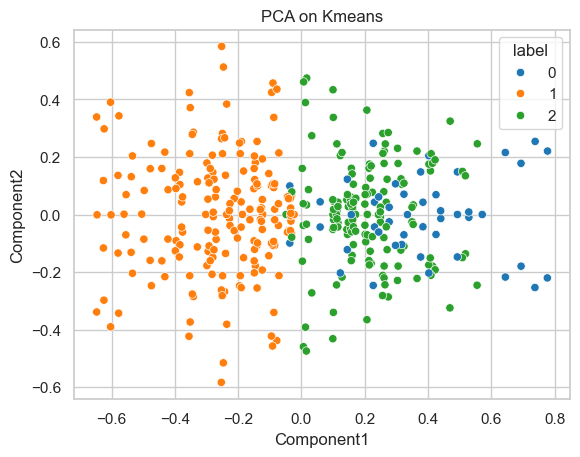

In [5]:
# PCA with 2 components 
plot_pca(arr, labels, num_components=2, metric='PCA on Kmeans')
plt.show()

(378, 3)


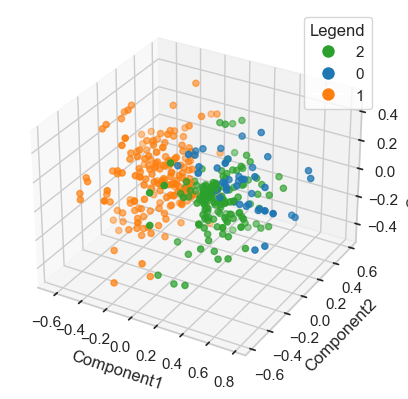

In [6]:
# PCA with 3 components 
plot_pca(arr, labels, num_components=3, metric='Kmeans: Euclidean')
# Plot 3d version in new window 
# %matplotlib
plt.show()

KL Divergence Val:  0.561669111251831


w:\Projects\NU_Earth\Electrical_Impedance_Tomography\EIT\src\utils.py:108: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df_tsne, x='Component1', y='Component2', hue='label', palette=colors, ax=ax1)


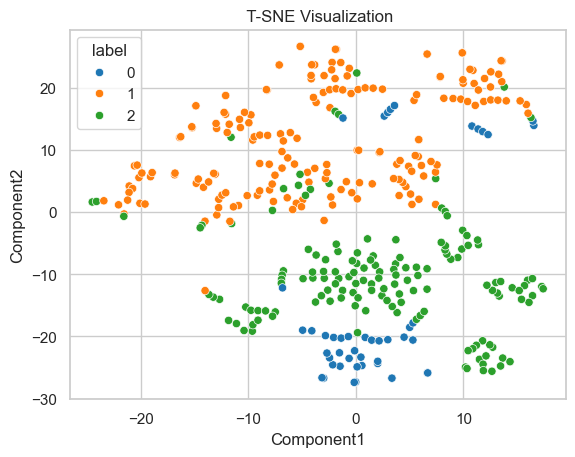

In [7]:
# T-sne with 2 components 
plot_tsne(arr, labels)


In [8]:
# Try in n-sphere coordinates 
r, thetas = cartesian_to_nsphere(arr) 
print(thetas.shape) 

(378, 25)


In [9]:
# Perform clustering 
kmeans = KMeans(n_clusters=20, n_init='auto').fit(thetas)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
clust_dist = dict(zip(unique, counts))
print(f"Cluster Distribution: {clust_dist}")

Cluster Distribution: {0: 15, 1: 13, 2: 23, 3: 23, 4: 16, 5: 19, 6: 26, 7: 9, 8: 24, 9: 27, 10: 19, 11: 38, 12: 14, 13: 24, 14: 17, 15: 16, 16: 12, 17: 12, 18: 14, 19: 17}


(378, 2)


w:\Projects\NU_Earth\Electrical_Impedance_Tomography\EIT\src\utils.py:74: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df_transformed, x='Component1', y='Component2', hue='label', palette=colors, ax=ax1)


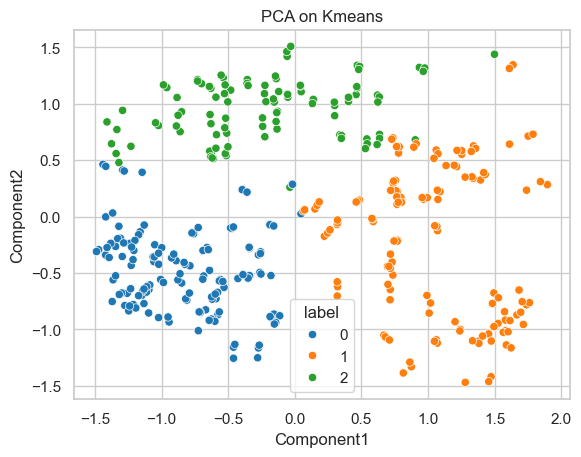

In [10]:
# PCA with 2 components 
plot_pca(thetas, labels, num_components=2, metric='PCA on Kmeans')
plt.show()

(378, 3)


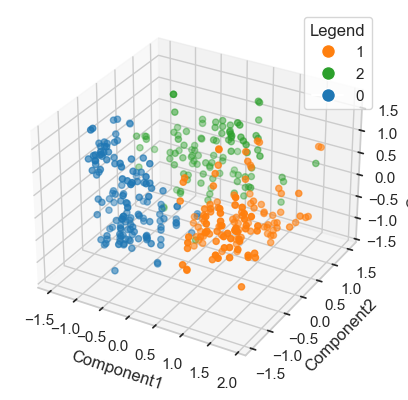

In [11]:
# PCA with 3 components 
plot_pca(thetas, labels, num_components=3, metric='Kmeans: Euclidean')
# Plot 3d version in new window 
# %matplotlib
plt.show()

KL Divergence Val:  0.5390580892562866


C:\Users\omkar\AppData\Local\Temp\ipykernel_11492\3362476155.py:42: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df_tsne, x='Component1', y='Component2', hue='label', palette=colors, ax=ax1)


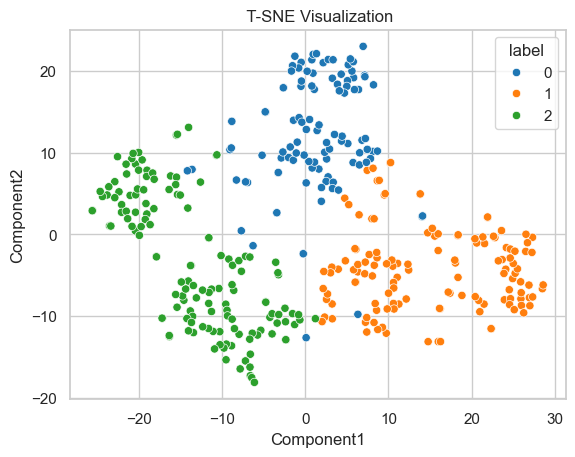

In [18]:
plot_tsne(thetas, labels)
